In [1]:
import librosa

In [3]:
import IPython

In [4]:
import librosa.display

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
import matplotlib as mpl

In [9]:
y_full, sr_full = librosa.load("./strings.wav")
IPython.display.Audio(data=y_full, rate=sr_full)

In [11]:
y, sr = librosa.load("./strings.wav", offset=15, duration=10)
IPython.display.Audio(data=y, rate=sr)

In [12]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(tempo)

95.703125


In [16]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
IPython.display.Audio(data=y_harmonic, rate=sr)

In [17]:
IPython.display.Audio(data=y_percussive, rate=sr)

In [20]:
y_harmonic_m3, y_percussive_m3 = librosa.effects.hpss(y, margin=3.0)

In [21]:
IPython.display.Audio(data=y_harmonic_m3, rate=sr)

In [22]:
IPython.display.Audio(data=y_percussive_m3, rate=sr)

In [23]:
D = librosa.stft(y)
H, P = librosa.decompose.hpss(D, margin=3.0)

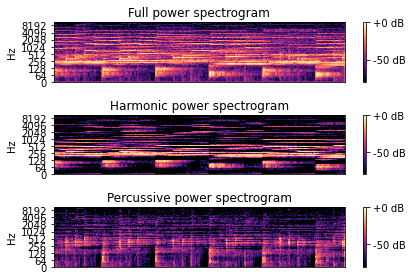

In [27]:
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Full power spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic power spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Percussive power spectrogram')

plt.tight_layout()
plt.show()